# Metropolis-Hastings算法

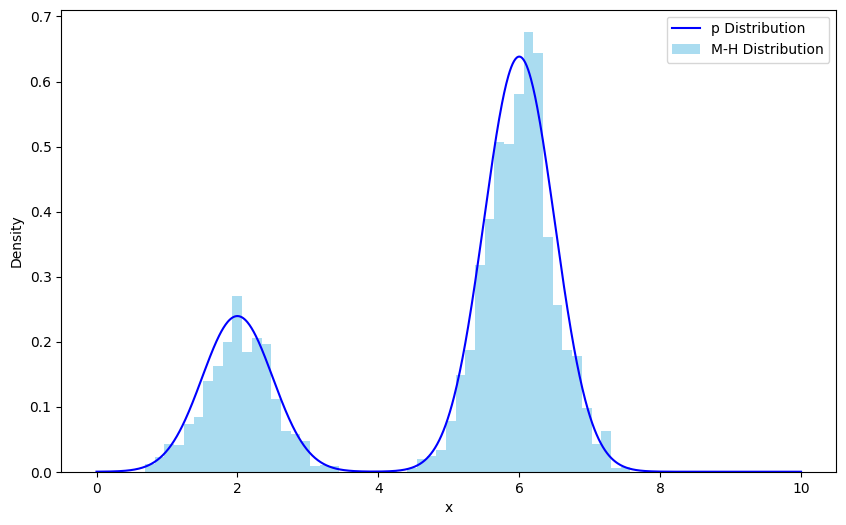

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 我们想要采样的目标分布p，以双峰高斯混合分布为例
def p(x):
    return 0.3 * stats.norm.pdf(x, loc=2, scale=0.5) + 0.8 * stats.norm.pdf(x, loc=6, scale=0.5)

# 转移核函数,即提议分布q，以非对称的对称随机游走为例
def q(x):
    if np.random.rand() < 0.5:
        return stats.norm.rvs(loc=x + 0.5, scale=2)  # 向右移动
    else:
        return stats.norm.rvs(loc=x - 0.5, scale=3)  # 向左移动

# Metropolis-Hastings算法
def metropolis_hastings(target_dist, trans_kernel, n_samples):
    samples = []
    # 初始状态
    current_state = 0 
    for _ in range(n_samples):
        # 从条件概率分布q中采样得到新的样本值
        candidate_state = trans_kernel(current_state)  
        # 计算接受概率
        acceptance_prob = min(1, target_dist(candidate_state) / target_dist(current_state))  
        # 从均匀分布中采样，决定是否接受候选状态
        if np.random.rand() < acceptance_prob:
            # 若接受，则转移采样点
            current_state = candidate_state
        samples.append(current_state)
    return samples

# 采样过程
samples = metropolis_hastings(p, q, n_samples=5000)

# 绘制样本分布图像
plt.figure(figsize=(10, 6))
x = np.linspace(0, 10, 1000)
plt.plot(x, p(x), label='p Distribution', color='blue')
plt.hist(samples, bins=50, density=True, label='M-H Distribution', color='skyblue', alpha=0.7)
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


# 吉布斯分布与马尔可夫随机场

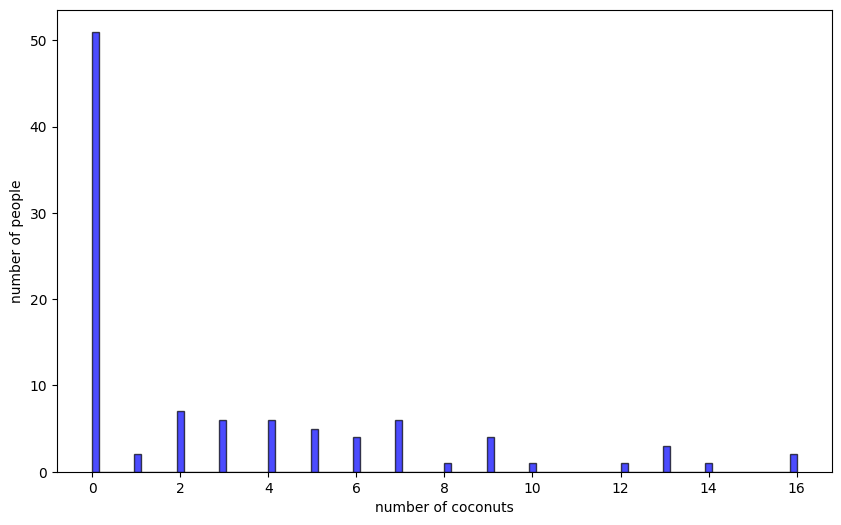

In [4]:
import random
import matplotlib.pyplot as plt
# 岛民总数
n_people = 100

# 初始椰子数量
n_coconuts = 300

# 初始每个人拥有的椰子数量
coconuts_per_person = 3

# 记录每个人当前拥有的椰子数量
coconuts_owned = [coconuts_per_person] * n_people

# 模拟遇见另一个岛民并进行石头剪刀布游戏的过程
for days in range(30):
    for i in range(n_people):
        # i和j相遇
        j = random.randint(0, n_people - 1)
        while j == i: # 如果j==i由于不能和自己相遇，则重新随机相遇一个人
            j = random.randint(0, n_people - 1)
    
        if coconuts_owned[i] == 0:
            continue
    
        if coconuts_owned[j] == 0:
            continue
    
        game_result = random.randint(0, 2)
    
        if game_result == 0:
            # i 赢了
            coconuts_owned[i] += 1
            coconuts_owned[j] -= 1
        elif game_result == 1:
            # j 赢了
            coconuts_owned[j] += 1
            coconuts_owned[i] -= 1

def plot_hist(data, bins=40):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, density=False, facecolor="blue", edgecolor="black", alpha=0.7)
    # 显示横轴标签
    plt.xlabel("number of coconuts")
    # 显示纵轴标签
    plt.ylabel("number of people")
    plt.show()


plot_hist(coconuts_owned, bins=100)